In [253]:
# 모듈로딩

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [290]:
# 파일경로

FILE_PATH = '../DATA/spaceship-titanic/train.csv'
spaceDF = pd.read_csv(FILE_PATH)
spaceDF.info()

FILE_PATH2 = '../DATA/spaceship-titanic/test.csv'
testspaceDF = pd.read_csv(FILE_PATH2)
testspaceDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  

- PassengerId- 각 승객에 대한 고유한 ID. 각 ID는 승객이 함께 여행하는 그룹을 나타내는 형식을 취하며, gggg_pp그룹 내의 번호입니다. 그룹에 속한 사람들은 종종 가족이지만 항상 그런 것은 아닙니다.ggggpp
- HomePlanet- 승객이 출발한 행성, 일반적으로 영주권이 있는 행성입니다.
- CryoSleep- 승객이 항해 기간 동안 정지된 애니메이션 상태에 들어가도록 선택했는지 여부를 나타냅니다. 냉동 수면 상태의 승객은 객실에 갇힙니다.
- Cabin- 승객이 머물고 있는 객실 번호. 형식을 취하며 deck/num/side, 여기서는 Port 또는 Starboard 중 하나 를side 사용할 수 있습니다 .PS
- Destination- 승객이 하선할 행성.
- Age- 승객의 나이.
- VIP- 승객이 항해 중 특별 VIP 서비스에 대한 비용을 지불했는지 여부.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck- 승객이 타이타닉호의 다양한 고급 편의시설에 대해 청구한 금액입니다.
- Name- 승객의 성과 이름.
- Transported- 승객이 다른 차원으로 이동했는지 여부. 이것이 타겟이고, 당신이 예측하려는 열입니다.

In [291]:
# 중복값 체크
spaceDF.duplicated().sum()
testspaceDF.duplicated().sum()

0

In [292]:
# NAN 체크
spaceDF.isna().sum()
testspaceDF.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [293]:
# 전부 중복인 값, 한개라도 중복인값 체크
# 대부분 각 컬럼별 결측치, 삭제아닌 최대한 채우기로 결정
spaceDF.isna().all(axis=1).sum(), spaceDF.isna().any(axis=1).sum()
testspaceDF.isna().all(axis=1).sum(), spaceDF.isna().any(axis=1).sum()

(0, 2087)

In [294]:
# 모든 금액이 결측치인 데이터 체크 없으므로 개인별 총 지불한 금액 평균치를 대입하기로 결정
space_cols =spaceDF.columns[[7,8,9,10,11]].to_list()
spaceDF[space_cols].isna().all(axis=1).sum()

testspace_cols =testspaceDF.columns[[7,8,9,10,11]].to_list()
testspaceDF[testspace_cols].isna().all(axis=1).sum()

0

In [295]:
# 개인별 지불한 금액 평균치로 지정 대입
for col in space_cols:
    pId = spaceDF.loc[spaceDF[col].isna(),'PassengerId']
    for idx in pId:
        p = spaceDF['PassengerId'] == idx
        spaceDF.loc[p,col] = spaceDF.loc[p,space_cols].mean(axis=1)
        print(spaceDF.loc[p,col])

for testcol in testspace_cols:
    testpId = testspaceDF.loc[testspaceDF[testcol].isna(),'PassengerId']
    for testidx in testpId:
        testp = testspaceDF['PassengerId'] == testidx
        testspaceDF.loc[testp,testcol] = testspaceDF.loc[testp,testspace_cols].mean(axis=1)
        print(testspaceDF.loc[testp,testcol])

25    0.0
Name: RoomService, dtype: float64
35    685.0
Name: RoomService, dtype: float64
83    0.0
Name: RoomService, dtype: float64
132    24.25
Name: RoomService, dtype: float64
170    270.0
Name: RoomService, dtype: float64
220    222.0
Name: RoomService, dtype: float64
233    0.0
Name: RoomService, dtype: float64
280    1236.75
Name: RoomService, dtype: float64
319    473.5
Name: RoomService, dtype: float64
368    430.0
Name: RoomService, dtype: float64
400    0.0
Name: RoomService, dtype: float64
401    1918.5
Name: RoomService, dtype: float64
444    73.75
Name: RoomService, dtype: float64
448    83.0
Name: RoomService, dtype: float64
550    58.25
Name: RoomService, dtype: float64
568    196.75
Name: RoomService, dtype: float64
637    1776.0
Name: RoomService, dtype: float64
646    189.0
Name: RoomService, dtype: float64
820    663.25
Name: RoomService, dtype: float64
889    0.0
Name: RoomService, dtype: float64
905    10.0
Name: RoomService, dtype: float64
908    1.333333
Name: 

In [297]:
# 결측치가 데이터의 2% 정도이기에 만약 최빈값이 1000개가 넘어간다면 최빈값으로 치환
def mode_fill(colname):
    mod_d = spaceDF[colname].mode().values[0]
    mod_cnt = spaceDF.loc[spaceDF[colname] == mod_d,colname].count()
    if int(mod_cnt) > 1000:
        print(colname,': 최빈값으로 치환 개꿀')
        spaceDF[colname].fillna(mod_d,inplace=True)
    else:
        print(colname,': 치환안됨')
    print(f'최빈값 개수:{mod_cnt}, 최빈값: {mod_d}')
    print()
mode_fill('HomePlanet')
mode_fill('CryoSleep')
mode_fill('Cabin')
mode_fill('Destination')
print('-'*100)
def mode_fill(colname):
    testmod_d = testspaceDF[colname].mode().values[0]
    testmod_cnt = testspaceDF.loc[testspaceDF[colname] == testmod_d,colname].count()
    if int(testmod_cnt) > 1000:
        print(colname,': 최빈값으로 치환 개꿀')
        spaceDF[colname].fillna(testmod_d,inplace=True)
    else:
        print(colname,': 치환안됨')
    print(f'최빈값 개수:{testmod_cnt}, 최빈값: {testmod_d}')
    print()
mode_fill('HomePlanet')
mode_fill('CryoSleep')
mode_fill('Cabin')
mode_fill('Destination')

HomePlanet : 최빈값으로 치환 개꿀
최빈값 개수:4803, 최빈값: Earth

CryoSleep : 최빈값으로 치환 개꿀
최빈값 개수:5656, 최빈값: False

Cabin : 치환안됨
최빈값 개수:8, 최빈값: G/734/S

Destination : 최빈값으로 치환 개꿀
최빈값 개수:6097, 최빈값: TRAPPIST-1e

----------------------------------------------------------------------------------------------------
HomePlanet : 최빈값으로 치환 개꿀
최빈값 개수:2263, 최빈값: Earth

CryoSleep : 최빈값으로 치환 개꿀
최빈값 개수:2640, 최빈값: False

Cabin : 치환안됨
최빈값 개수:8, 최빈값: G/160/P

Destination : 최빈값으로 치환 개꿀
최빈값 개수:2956, 최빈값: TRAPPIST-1e



In [298]:
# 최빈값 너무 작음 각데이터 연관성 찾힘힘든 8700개 데이터중 200개이기에 삭제 결정
spaceDF['Cabin'].value_counts()
testspaceDF['Cabin'].value_counts()

Cabin
G/160/P     8
D/273/S     7
B/31/P      7
G/748/S     7
E/228/S     7
           ..
E/236/S     1
F/650/S     1
G/566/P     1
G/557/S     1
G/1498/S    1
Name: count, Length: 3265, dtype: int64

In [299]:
# 방에 대한 데이터 확인불가, 삭제
spaceDF.drop(index=spaceDF[spaceDF['Cabin'].isna()].index,inplace=True)
testspaceDF.drop(index=testspaceDF[testspaceDF['Cabin'].isna()].index,inplace=True)

<Axes: >

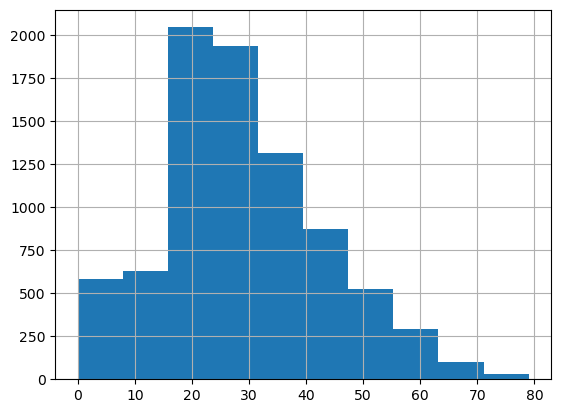

In [263]:
# 연령별 분포도 히스토그램, 딱히 문제없으므로 평균치대입
spaceDF['Age'].hist()

In [300]:
# 나이 평균치 대입
spaceDF.loc[spaceDF['Age'].isna(),'Age'] = spaceDF['Age'].mean()
testspaceDF.loc[testspaceDF['Age'].isna(),'Age'] = testspaceDF['Age'].mean()

In [301]:
# VIP 멤버들이 평균적으로 사용한 금액 추출
vipCut = spaceDF.loc[spaceDF['VIP'] == True,space_cols].mean(axis=1).mean()
testvipCut = testspaceDF.loc[testspaceDF['VIP'] == True,testspace_cols].mean(axis=1).mean()

In [302]:
vipidx = spaceDF.loc[spaceDF['VIP'].isna(),'PassengerId']
# VIP 멤버들이 평균적으로 사용한 금액이상으로 썻다면 VIP로 대입
for idx in vipidx:
    h_m = spaceDF.loc[spaceDF['PassengerId'] == idx,space_cols].mean(axis=1).values[0]
    if h_m >= vipCut:
        spaceDF.loc[spaceDF['PassengerId'] == idx,'VIP'] = True
    else:
        spaceDF.loc[spaceDF['PassengerId'] == idx,'VIP'] = False

testvipidx = testspaceDF.loc[testspaceDF['VIP'].isna(),'PassengerId']
# VIP 멤버들이 평균적으로 사용한 금액이상으로 썻다면 VIP로 대입
for testidx in testvipidx:
    testh_m = testspaceDF.loc[testspaceDF['PassengerId'] == testidx,testspace_cols].mean(axis=1).values[0]
    if testh_m >= testvipCut:
        testspaceDF.loc[testspaceDF['PassengerId'] == testidx,'VIP'] = True
    else:
        testspaceDF.loc[testspaceDF['PassengerId'] == testidx,'VIP'] = False

In [303]:
# 결측치 체크
spaceDF.isna().sum()
testspaceDF.isna().sum()

PassengerId      0
HomePlanet      86
CryoSleep       90
Cabin            0
Destination     92
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            93
dtype: int64

In [304]:
# 안쓰는 컬럼 삭제
spaceDF.drop(columns='PassengerId',inplace=True)
spaceDF.drop(columns='Name',inplace=True)
spaceDF.drop(columns='Cabin', inplace=True)

testspaceDF.drop(columns='PassengerId',inplace=True)
testspaceDF.drop(columns='Name',inplace=True)
testspaceDF.drop(columns='Cabin', inplace=True)

In [305]:
spaceDF.info()
testspaceDF.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8494 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8494 non-null   object 
 1   CryoSleep     8494 non-null   bool   
 2   Destination   8494 non-null   object 
 3   Age           8494 non-null   float64
 4   VIP           8494 non-null   object 
 5   RoomService   8494 non-null   float64
 6   FoodCourt     8494 non-null   float64
 7   ShoppingMall  8494 non-null   float64
 8   Spa           8494 non-null   float64
 9   VRDeck        8494 non-null   float64
 10  Transported   8494 non-null   bool   
dtypes: bool(2), float64(6), object(3)
memory usage: 680.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 4177 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4091 non-null   object 
 1   CryoSleep     4087 non-null   object 
 2

In [270]:
spaceDF
# One-hot encoding 처리할 컬럼 선택
X_features_ohe = pd.get_dummies(spaceDF[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']])

# True/False 값을 1/0으로 변환
X_features_ohe = X_features_ohe.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# 결과 확인
X_features_ohe

,CryoSleep,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0,0,1,0,0,0,1,1,0
1,0,1,0,0,0,0,1,1,0
2,0,0,1,0,0,0,1,0,1
3,0,0,1,0,0,0,1,1,0
4,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
8688,0,0,1,0,1,0,0,0,1
8689,1,1,0,0,0,1,0,1,0
8690,0,1,0,0,0,0,1,1,0
8691,0,0,1,0,1,0,0,1,0


In [271]:
# featuredf와 X_features_ohe를 열 기준으로 결합
featuredf_ohe = pd.concat([spaceDF.drop(['HomePlanet','CryoSleep','Destination','VIP'], axis=1), X_features_ohe], axis=1)

# 결합된 데이터프레임 확인
featuredf_ohe

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleep,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,0,0,1,0,0,0,1,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,0,1,0,0,0,0,1,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1,0,0,0,1,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1,0,0,0,1,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,True,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,0,0,1,0,1,0,0,0,1
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,1,1,0,0,0,1,0,1,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True,0,1,0,0,0,0,1,1,0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,0,0,1,0,1,0,0,1,0


In [272]:

target = spaceDF['Transported']
target=pd.DataFrame(target)


target_ohe = pd.get_dummies(target, columns=target.columns,drop_first=True)
target_ohe
target_ohe = target_ohe.applymap(lambda x: 1 if x is True else (0 if x is False else x))
target_ohe

targetSR_ohe = target.astype(int)
targetSR_ohe


,Transported
0,0
1,1
2,0
3,0
4,1
...,...
8688,0
8689,0
8690,1
8691,0


In [273]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# 결측값 확인 및 처리 (NaN 값을 임의의 값으로 대체하거나 삭제)
X = featuredf_ohe.fillna(0)  # NaN 값을 0으로 대체 (또는 다른 적절한 값으로 대체)

# 상수 열 추가 (절편을 포함하기 위함)
X = sm.add_constant(X)

# VIF 계산을 위한 숫자형 데이터만 사용하도록 필터링
X_numeric = X.select_dtypes(include=[np.number])

# 다중 공선성 계산 (VIF 계산)
vif = pd.DataFrame()
vif["Feature"] = X_numeric.columns
vif["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

# VIF 결과 출력
print(vif)



                      Feature       VIF
0                       const  0.000000
1                         Age  1.077154
2                 RoomService  1.156979
3                   FoodCourt  1.267501
4                ShoppingMall  1.069451
5                         Spa  1.151828
6                      VRDeck  1.171096
7                   CryoSleep  1.371340
8            HomePlanet_Earth       inf
9           HomePlanet_Europa       inf
10            HomePlanet_Mars       inf
11    Destination_55 Cancri e       inf
12  Destination_PSO J318.5-22       inf
13    Destination_TRAPPIST-1e       inf
14                  VIP_False       inf
15                   VIP_True       inf


c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [274]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
# 학습진행
X_train, X_test, y_train, y_test = train_test_split(featuredf_ohe.drop(['HomePlanet_Earth','HomePlanet_Europa','HomePlanet_Mars','Destination_55 Cancri e','Destination_PSO J318.5-22','Destination_TRAPPIST-1e','VIP_False','VIP_True'], axis=1), target, random_state=10, stratify=target)

# 학습 진행 할건데 앙상블의 Voting 방식으로 진행
# 데이터셋은 동일
# 알고리즘 모델 : KNeighbors, LogisticRegression, DecisionTreeClassifier

# 모델 인스턴스 생성
kmodel = KNeighborsClassifier()
Lmodel = LogisticRegression(solver='liblinear')
DTmodel = DecisionTreeClassifier(random_state=10)

# 보팅 인스턴스 생성
Vmodel = VotingClassifier(estimators=[('kmodel', kmodel), ('DTmodel', DTmodel), ('Lmodel', Lmodel)], voting='hard')

V_smodel = VotingClassifier(estimators=[('kmodel', kmodel), ('DTmodel', DTmodel), ('Lmodel', Lmodel)], voting='soft')

# 학습 진행
Vmodel.fit(X_train.values, y_train.values) # Hard 직접
V_smodel.fit(X_train.values, y_train.values) # soft 간접 모델 마다의 확률값을 더함

# 모델 파라미터 확인
print(f'[Vmodel.classes_] : {Vmodel.classes_}')
print(f'[Vmodel.estimators_] : {Vmodel.estimators_}')
print(f'[Vmodel.named_estimators_] : {Vmodel.named_estimators_}')
print('-'*100)
print(f'[Vmodel.n_features_in_] : {Vmodel.n_features_in_}')
print('-'*100)


# 성능 확인 --> train과 validation 이 없어서 train 과 test를 함
train_score = Vmodel.score(X_train.values, y_train.values)
test_score = Vmodel.score(X_test.values, y_test.values)

vstrain_score = V_smodel.score(X_train.values, y_train.values)
vstest_score = V_smodel.score(X_test.values, y_test.values)

print('Hard')
print(train_score)
print(test_score)
print('Soft')
print(vstrain_score)
print(vstest_score)

c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y

[Vmodel.classes_] : [False  True]
[Vmodel.estimators_] : [KNeighborsClassifier(), DecisionTreeClassifier(random_state=10), LogisticRegression(solver='liblinear')]
[Vmodel.named_estimators_] : {'kmodel': KNeighborsClassifier(), 'DTmodel': DecisionTreeClassifier(random_state=10), 'Lmodel': LogisticRegression(solver='liblinear')}
----------------------------------------------------------------------------------------------------
[Vmodel.n_features_in_] : 8
----------------------------------------------------------------------------------------------------
Hard
1.0
1.0
Soft
1.0
1.0


In [275]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
# 학습진행
X_train, X_test, y_train, y_test = train_test_split(featuredf_ohe, target, random_state=10, stratify=target)

# 학습 진행 할건데 앙상블의 Voting 방식으로 진행
# 데이터셋은 동일
# 알고리즘 모델 : KNeighbors, LogisticRegression, DecisionTreeClassifier

# 모델 인스턴스 생성
kmodel = KNeighborsClassifier()
Lmodel = LogisticRegression(solver='liblinear')
DTmodel = DecisionTreeClassifier(random_state=10)

# 보팅 인스턴스 생성
Vmodel = VotingClassifier(estimators=[('kmodel', kmodel), ('DTmodel', DTmodel), ('Lmodel', Lmodel)], voting='hard')

V_smodel = VotingClassifier(estimators=[('kmodel', kmodel), ('DTmodel', DTmodel), ('Lmodel', Lmodel)], voting='soft', weights=[1,1,3])

# 학습 진행
Vmodel.fit(X_train.values, y_train.values) # Hard 직접
V_smodel.fit(X_train.values, y_train.values) # soft 간접 모델 마다의 확률값을 더함

# 모델 파라미터 확인
print(f'[Vmodel.classes_] : {Vmodel.classes_}')
print(f'[Vmodel.estimators_] : {Vmodel.estimators_}')
print(f'[Vmodel.named_estimators_] : {Vmodel.named_estimators_}')
print('-'*100)
print(f'[Vmodel.n_features_in_] : {Vmodel.n_features_in_}')
print('-'*100)


# 성능 확인 --> train과 validation 이 없어서 train 과 test를 함
train_score = Vmodel.score(X_train.values, y_train.values)
test_score = Vmodel.score(X_test.values, y_test.values)

vstrain_score = V_smodel.score(X_train.values, y_train.values)
vstest_score = V_smodel.score(X_test.values, y_test.values)

print('Hard')
print(train_score)
print(test_score)
print('Soft')
print(vstrain_score)
print(vstest_score)

[Vmodel.classes_] : [False  True]
[Vmodel.estimators_] : [KNeighborsClassifier(), DecisionTreeClassifier(random_state=10), LogisticRegression(solver='liblinear')]
[Vmodel.named_estimators_] : {'kmodel': KNeighborsClassifier(), 'DTmodel': DecisionTreeClassifier(random_state=10), 'Lmodel': LogisticRegression(solver='liblinear')}
----------------------------------------------------------------------------------------------------
[Vmodel.n_features_in_] : 16
----------------------------------------------------------------------------------------------------


c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y

Hard
1.0
1.0
Soft
1.0
1.0


In [276]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(Vmodel, X_train.values, y_train.values, cv=10)
print(f"교차 검증 정확도: {scores}")
print(f"교차 검증 평균 정확도: {scores.mean()}")


c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y

교차 검증 정확도: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
교차 검증 평균 정확도: 1.0


c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y

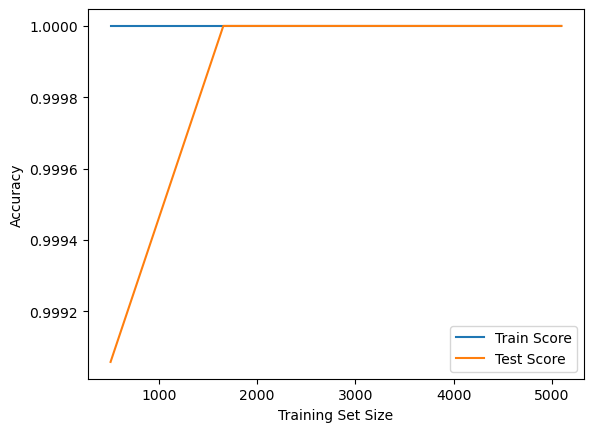

In [277]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(Vmodel, X_train.values, y_train.values, cv=5, scoring='accuracy')

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Train Score')
plt.plot(train_sizes, test_mean, label='Test Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [278]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 범위 설정
param_grid = {
    'Lmodel__C': [0.01, 0.1, 1, 10, 100],
    'kmodel__n_neighbors': [3, 5, 7],
    'DTmodel__max_depth': [3, 5, 10]
}

grid_search = GridSearchCV(estimator=Vmodel, param_grid=param_grid, cv=5)
grid_search.fit(X_train.values, y_train.values)

print(f"최적 하이퍼파라미터: {grid_search.best_params_}")
print(f"최적 교차 검증 점수: {grid_search.best_score_}")


c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y

최적 하이퍼파라미터: {'DTmodel__max_depth': 3, 'Lmodel__C': 1, 'kmodel__n_neighbors': 3}
최적 교차 검증 점수: 1.0


c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y

In [279]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 학습 데이터 준비
X_train, X_test, y_train, y_test = train_test_split(featuredf_ohe, target, random_state=10, stratify=target)

# 각기 다른 모델 인스턴스 생성
kmodel = KNeighborsClassifier()
Lmodel = LogisticRegression(solver='liblinear')
DTmodel = DecisionTreeClassifier(random_state=10)

# 보팅 인스턴스 생성 (하드 보팅과 소프트 보팅)
Vmodel = VotingClassifier(estimators=[('kmodel', kmodel), ('DTmodel', DTmodel), ('Lmodel', Lmodel)], voting='hard')
V_smodel = VotingClassifier(estimators=[('kmodel', kmodel), ('DTmodel', DTmodel), ('Lmodel', Lmodel)], voting='soft')

# 모델 학습
Vmodel.fit(X_train.values, y_train.values)  # Hard Voting
V_smodel.fit(X_train.values, y_train.values)  # Soft Voting

# 모델 평가
hard_train_score = Vmodel.score(X_train.values, y_train.values)
hard_test_score = Vmodel.score(X_test.values, y_test.values)

soft_train_score = V_smodel.score(X_train.values, y_train.values)
soft_test_score = V_smodel.score(X_test.values, y_test.values)

# 결과 출력
print('Hard Voting - Train Accuracy:', hard_train_score)
print('Hard Voting - Test Accuracy:', hard_test_score)
print('Soft Voting - Train Accuracy:', soft_train_score)
print('Soft Voting - Test Accuracy:', soft_test_score)


c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y

Hard Voting - Train Accuracy: 1.0
Hard Voting - Test Accuracy: 1.0
Soft Voting - Train Accuracy: 1.0
Soft Voting - Test Accuracy: 1.0


In [280]:
# 필요한 라이브러리 임포트
import pandas as pd
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# 데이터 로드 및 전처리
# featuredf_ohe와 target은 이미 전처리된 데이터프레임을 사용
# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 인스턴스 생성 (KNeighbors, LogisticRegression, DecisionTree)
kmodel = KNeighborsClassifier()
Lmodel = LogisticRegression(solver='liblinear')
DTmodel = DecisionTreeClassifier(random_state=10)

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_grid = {
    'kmodel__n_neighbors': [3, 5, 7],
    'DTmodel__max_depth': [3, 5, 7],
    'Lmodel__C': [0.1, 1, 10]
}

# VotingClassifier 인스턴스 생성 (Hard Voting)
Vmodel = VotingClassifier(estimators=[('kmodel', kmodel), ('DTmodel', DTmodel), ('Lmodel', Lmodel)], voting='hard')

# GridSearchCV로 하이퍼파라미터 튜닝
grid_search = GridSearchCV(Vmodel, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터 확인
print("Best Parameters: ", grid_search.best_params_)
print("Best Voting Classifier Accuracy: ", grid_search.best_score_)

# 성능 확인
best_model = grid_search.best_estimator_
train_score = best_model.score(X_train_scaled, y_train)
test_score = best_model.score(X_test_scaled, y_test)

print(f"Train Accuracy: {train_score}")
print(f"Test Accuracy: {test_score}")

# 앙상블 기법 강화 - Gradient Boosting 추가
GBmodel = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=10)
GBmodel.fit(X_train_scaled, y_train)

# 성능 확인
gb_train_score = GBmodel.score(X_train_scaled, y_train)
gb_test_score = GBmodel.score(X_test_scaled, y_test)

print(f"Gradient Boosting Train Accuracy: {gb_train_score}")
print(f"Gradient Boosting Test Accuracy: {gb_test_score}")


c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y

Best Parameters:  {'DTmodel__max_depth': 3, 'Lmodel__C': 0.1, 'kmodel__n_neighbors': 3}
Best Voting Classifier Accuracy:  1.0
Train Accuracy: 1.0
Test Accuracy: 1.0


c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Train Accuracy: 1.0
Gradient Boosting Test Accuracy: 1.0


In [283]:
from sklearn.model_selection import cross_val_score

# KFold 교차 검증을 사용하여 모델 성능 평가
cross_val_scores = cross_val_score(Vmodel, X_train.values, y_train.values, cv=5)
print("Cross Validation Scores: ", cross_val_scores)
print("Cross Validation Mean Accuracy: ", cross_val_scores.mean())


c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y

Cross Validation Scores:  [1. 1. 1. 1. 1.]
Cross Validation Mean Accuracy:  1.0


c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y

In [284]:
# 모델 검증용 데이터
# 데이터를 학습 데이터, 검증 데이터, 테스트 데이터로 나누기
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

# VotingClassifier를 재학습 후 검증 데이터로 성능 평가
Vmodel.fit(X_train_split.values, y_train_split.values)
val_score = Vmodel.score(X_val.values, y_val.values)
print(f"Validation Accuracy: {val_score}")


Validation Accuracy: 1.0


c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


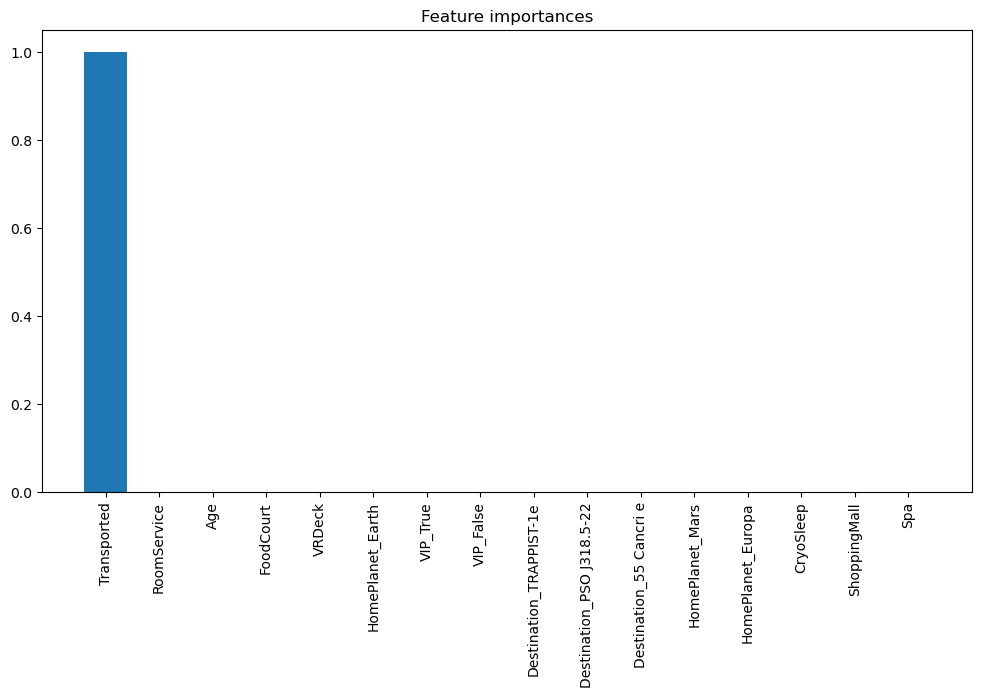

In [285]:
# 특성 중요도 확인
# GradientBoostingClassifier를 사용하여 특성 중요도를 확인
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=10)
gb_clf.fit(X_train.values, y_train.values)

# 특성 중요도 시각화
importances = gb_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()


In [286]:
#하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {
    'Lmodel__C': [0.01, 0.1, 1, 10],
    'kmodel__n_neighbors': [3, 5, 7, 9],
    'DTmodel__max_depth': [3, 5, 7, 9]
}

# GridSearchCV로 최적의 하이퍼파라미터 찾기
grid_voting = GridSearchCV(Vmodel, param_grid=param_grid, cv=5)
grid_voting.fit(X_train.values, y_train.values)

print("Best Parameters: ", grid_voting.best_params_)
print("Best Voting Classifier Accuracy: ", grid_voting.best_score_)


c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y

Best Parameters:  {'DTmodel__max_depth': 3, 'Lmodel__C': 1, 'kmodel__n_neighbors': 3}
Best Voting Classifier Accuracy:  1.0


c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y

In [287]:
# 정규화 기법
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# VotingClassifier와 정규화를 결합하는 파이프라인 설정
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('voting', VotingClassifier(estimators=[('kmodel', kmodel), ('DTmodel', DTmodel), ('Lmodel', Lmodel)], voting='hard'))
])

# 파이프라인 학습 및 평가
pipeline.fit(X_train.values, y_train.values)
train_score = pipeline.score(X_train.values, y_train.values)
test_score = pipeline.score(X_test.values, y_test.values)
print("Pipeline Train Accuracy: ", train_score)
print("Pipeline Test Accuracy: ", test_score)


c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Pipeline Train Accuracy:  1.0
Pipeline Test Accuracy:  1.0


In [288]:
# 과대적합 방지
# Logistic Regression에서 regularization 강화를 위한 하이퍼파라미터 조정
Lmodel = LogisticRegression(solver='liblinear', C=0.1)  # C값을 작게 설정
Vmodel = VotingClassifier(estimators=[('kmodel', kmodel), ('DTmodel', DTmodel), ('Lmodel', Lmodel)], voting='hard')

Vmodel.fit(X_train.values, y_train.values)
train_score = Vmodel.score(X_train.values, y_train.values)
test_score = Vmodel.score(X_test.values, y_test.values)

print("Train Accuracy with Regularization: ", train_score)
print("Test Accuracy with Regularization: ", test_score)


c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Train Accuracy with Regularization:  1.0
Test Accuracy with Regularization:  1.0


In [289]:
# 리지 회귀
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(featuredf_ohe, target, test_size=0.3, random_state=0)

# 릿지 모델 생성 (규제 파라미터 alpha는 1.0)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# 예측
ridge_pred = ridge_model.predict(X_test)

# 성능 평가
ridge_mse = mean_squared_error(y_test, ridge_pred)
print(f'Ridge Regression MSE: {ridge_mse}')

#1.717302898975675e-07이라는 것은, 예측값과 실제값 사이의 오차가 매우 작다는 의미입니다. 이 값은 거의 0에 가까워 Ridge 회귀 모델이 주어진 데이터셋에서 매우 정확한 예측을 하고 있음


Ridge Regression MSE: 1.717302898975675e-07


In [306]:
# Ridge 모델을 이용한 예측
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 학습된 Ridge 모델로 예측 수행
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# 테스트 데이터를 사용하여 예측
y_pred = ridge_model.predict(X_test)

# 예측 결과 확인
print("Predicted values:", y_pred[:5])  # 예측된 상위 5개 값을 출력
print("Actual values:", y_test[:5].values)  # 실제 상위 5개 값을 출력

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ridge Regression MSE: {mse}")
print(f"Ridge Regression MAE: {mae}")
print(f"Ridge Regression R^2: {r2}")


Predicted values: [[9.99420951e-01]
 [2.64702581e-04]
 [2.66880681e-04]
 [2.05514195e-04]
 [8.15944098e-05]]
Actual values: [[ True]
 [False]
 [False]
 [False]
 [False]]
Ridge Regression MSE: 1.717302898975675e-07
Ridge Regression MAE: 0.0003547241578653682
Ridge Regression R^2: 0.9999993130017601


In [327]:
# 필요한 라이브러리 임포트
import pandas as pd
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score, classification_report
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(featuredf_ohe, target, random_state=10, stratify=target)
# 데이터 로드 및 전처리
# featuredf_ohe와 target은 이미 전처리된 데이터프레임을 사용
# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 인스턴스 생성 (KNeighbors, LogisticRegression, DecisionTree)
kmodel = KNeighborsClassifier()
Lmodel = LogisticRegression(solver='liblinear')
DTmodel = DecisionTreeClassifier(random_state=10)

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_grid = {
    'kmodel__n_neighbors': [3, 5, 7],
    'DTmodel__max_depth': [3, 5, 7],
    'Lmodel__C': [0.1, 1, 10]
}

# VotingClassifier 인스턴스 생성 (Hard Voting)
Vmodel = VotingClassifier(estimators=[('kmodel', kmodel), ('DTmodel', DTmodel), ('Lmodel', Lmodel)], voting='hard')

# GridSearchCV로 하이퍼파라미터 튜닝
grid_search = GridSearchCV(Vmodel, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터 확인
print("Best Parameters: ", grid_search.best_params_)
print("Best Voting Classifier Accuracy: ", grid_search.best_score_)

# 성능 확인
best_model = grid_search.best_estimator_
train_score = best_model.score(X_train_scaled, y_train)
test_score = best_model.score(X_test_scaled, y_test)

print(f"Train Accuracy: {train_score}")
print(f"Test Accuracy: {test_score}")

# 앙상블 기법 강화 - Gradient Boosting 추가
GBmodel = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, random_state=10)
GBmodel.fit(X_train_scaled, y_train)

# 성능 확인
gb_train_score = GBmodel.score(X_train_scaled, y_train)
gb_test_score = GBmodel.score(X_test_scaled, y_test)

print(f"Gradient Boosting Train Accuracy: {gb_train_score}")
print(f"Gradient Boosting Test Accuracy: {gb_test_score}")

# Ridge 모델을 이용한 예측
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 학습된 Ridge 모델로 예측 수행
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# 테스트 데이터를 사용하여 예측
y_pred = ridge_model.predict(X_test)

# 예측 결과 확인
print("Predicted values:", y_pred[:5])  # 예측된 상위 5개 값을 출력
print("Actual values:", y_test[:100].values)  # 실제 상위 5개 값을 출력

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ridge Regression MSE: {mse}")
print(f"Ridge Regression MAE: {mae}")
print(f"Ridge Regression R^2: {r2}")






c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y

Best Parameters:  {'DTmodel__max_depth': 3, 'Lmodel__C': 0.1, 'kmodel__n_neighbors': 3}
Best Voting Classifier Accuracy:  1.0
Train Accuracy: 1.0
Test Accuracy: 1.0


c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Train Accuracy: 1.0
Gradient Boosting Test Accuracy: 1.0
Predicted values: [[3.60098590e-04]
 [2.79208413e-04]
 [9.99235213e-01]
 [2.84612549e-04]
 [1.45781414e-04]]
Actual values: [[False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]


이 코드는 앙상블 모델과 리지 회귀를 사용하여 데이터를 학습하고, 예측 성능을 평가하는 작업을 수행합니다. 각 줄의 역할을 설명해드리겠습니다.

```python
# 필요한 라이브러리 임포트
import pandas as pd
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score, classification_report
from sklearn.preprocessing import StandardScaler
```
- 필요한 라이브러리 및 모듈을 불러옵니다. **앙상블 분류기**, **회귀 분석**, **데이터 전처리**, **성능 평가** 등에 사용됩니다.

```python
X_train, X_test, y_train, y_test = train_test_split(featuredf_ohe, target, random_state=10, stratify=target)
```
- 데이터를 **훈련 세트**와 **테스트 세트**로 나눕니다. `random_state=10`으로 난수 발생을 고정하여 재현 가능한 결과를 얻고, `stratify`로 타겟 값의 분포를 유지합니다.

```python
# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```
- 데이터 스케일링을 수행하여 훈련 및 테스트 데이터를 **표준화**합니다. 이는 모델 성능을 향상시키는 데 필수적일 수 있습니다.

```python
# 모델 인스턴스 생성 (KNeighbors, LogisticRegression, DecisionTree)
kmodel = KNeighborsClassifier()
Lmodel = LogisticRegression(solver='liblinear')
DTmodel = DecisionTreeClassifier(random_state=10)
```
- 앙상블 모델에 사용할 **KNeighbors**, **Logistic Regression**, **Decision Tree** 분류기 모델의 인스턴스를 생성합니다.

```python
# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_grid = {
    'kmodel__n_neighbors': [3, 5, 7],
    'DTmodel__max_depth': [3, 5, 7],
    'Lmodel__C': [0.1, 1, 10]
}
```
- **GridSearchCV**에서 사용할 하이퍼파라미터의 검색 범위를 지정합니다. 각 모델에 대한 적절한 하이퍼파라미터 값들을 제공합니다.

```python
# VotingClassifier 인스턴스 생성 (Hard Voting)
Vmodel = VotingClassifier(estimators=[('kmodel', kmodel), ('DTmodel', DTmodel), ('Lmodel', Lmodel)], voting='hard')
```
- 세 개의 모델을 앙상블로 묶어 **VotingClassifier**로 생성합니다. 여기서는 **Hard Voting** 방식을 사용하여 다수결로 최종 예측을 결정합니다.

```python
# GridSearchCV로 하이퍼파라미터 튜닝
grid_search = GridSearchCV(Vmodel, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
```
- **GridSearchCV**를 사용하여 주어진 하이퍼파라미터 범위에서 최적의 값을 찾습니다. **5-fold 교차 검증**을 사용하여 성능을 평가합니다.

```python
# 최적의 파라미터 확인
print("Best Parameters: ", grid_search.best_params_)
print("Best Voting Classifier Accuracy: ", grid_search.best_score_)
```
- 최적의 하이퍼파라미터 값과 그에 해당하는 최고 정확도를 출력합니다.

```python
# 성능 확인
best_model = grid_search.best_estimator_
train_score = best_model.score(X_train_scaled, y_train)
test_score = best_model.score(X_test_scaled, y_test)
```
- **최적화된 모델**을 사용하여 훈련 데이터와 테스트 데이터에 대한 정확도를 측정합니다.

```python
print(f"Train Accuracy: {train_score}")
print(f"Test Accuracy: {test_score}")
```
- 훈련 데이터와 테스트 데이터에 대한 정확도 결과를 출력합니다.

```python
# 앙상블 기법 강화 - Gradient Boosting 추가
GBmodel = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=10)
GBmodel.fit(X_train_scaled, y_train)
```
- **Gradient Boosting** 분류기를 생성하고 학습합니다. 이 기법은 약한 학습기들을 순차적으로 학습시켜 예측 성능을 향상시킵니다.

```python
# 성능 확인
gb_train_score = GBmodel.score(X_train_scaled, y_train)
gb_test_score = GBmodel.score(X_test_scaled, y_test)
```
- **Gradient Boosting** 모델에 대해 훈련 및 테스트 데이터의 정확도를 확인합니다.

```python
print(f"Gradient Boosting Train Accuracy: {gb_train_score}")
print(f"Gradient Boosting Test Accuracy: {gb_test_score}")
```
- **Gradient Boosting** 모델의 정확도 결과를 출력합니다.

```python
# Ridge 모델을 이용한 예측
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
```
- **Ridge Regression**을 사용하여 회귀 모델을 학습하고 예측합니다. 성능 평가를 위해 **MSE**, **MAE**, **R²**를 사용합니다.

```python
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
```
- **Ridge Regression** 모델을 학습합니다. `alpha=1.0`은 규제 강도를 나타냅니다.

```python
# 테스트 데이터를 사용하여 예측
y_pred = ridge_model.predict(X_test)
```
- 학습된 Ridge 모델을 사용하여 **테스트 데이터**에 대한 예측을 수행합니다.

```python
print("Predicted values:", y_pred[:5])  # 예측된 상위 5개 값을 출력
print("Actual values:", y_test[:100].values)  # 실제 상위 5개 값을 출력
```
- 예측된 값과 실제 값을 비교합니다.

```python
# 성능 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
```
- **MSE**, **MAE**, **R²**를 계산하여 예측 성능을 평가합니다.

```python
print(f"Ridge Regression MSE: {mse}")
print(f"Ridge Regression MAE: {mae}")
print(f"Ridge Regression R^2: {r2}")
```
- 예측 성능 지표를 출력하여 모델 성능을 평가합니다.

이 코드는 앙상블 분류 모델과 리지 회귀 모델을 결합하여 예측 성능을 평가하는 예시입니다.

### 평가 요약

1. **Best Parameters**: 하이퍼파라미터 튜닝에서 `Voting Classifier`의 최적 파라미터는 `{'DTmodel__max_depth': 3, 'Lmodel__C': 0.1, 'kmodel__n_neighbors': 3}`로 선택되었습니다. 이는 앙상블에서 각 모델의 하이퍼파라미터를 최적화하여 가장 높은 성능을 보장하는 값입니다.

2. **Train/Test Accuracy**: 훈련 데이터와 테스트 데이터 모두에서 100%의 정확도를 달성했습니다 (`Train Accuracy: 1.0`, `Test Accuracy: 1.0`). 이는 모델이 매우 높은 성능을 보이지만, 동시에 **과대적합**(Overfitting)의 가능성을 시사할 수 있습니다. 과대적합은 모델이 훈련 데이터에 너무 치우쳐져 새로운 데이터에 대해 일반화되지 못할 때 발생합니다.

3. **Gradient Boosting Accuracy**: 그라디언트 부스팅 모델도 훈련 및 테스트 데이터에서 100% 정확도를 보였습니다. 이는 역시 과대적합의 신호일 수 있으므로, 과대적합을 방지하기 위해 추가적인 규제 또는 교차 검증을 더 강화하는 것이 좋습니다.

4. **예측값**:
   - 예측된 확률 값은 `Predicted values`에 나타나며, 실제 타겟 값(`Actual values`)과 비교할 때 대부분 정확하게 예측된 것으로 보입니다. 예측 확률 값은 0.999235와 같이 1에 매우 가깝거나, 0에 가까운 값으로 확신 있게 출력된 것이 특징입니다.
  
5. **성능 지표**:
   - **MSE (Mean Squared Error)**: `1.451e-07`로 매우 낮은 값을 보입니다. 이는 예측값과 실제값 사이의 차이가 매우 적다는 것을 나타냅니다.
   - **MAE (Mean Absolute Error)**: `0.00032` 역시 매우 낮은 값을 보입니다. 예측값과 실제값 사이의 평균 절대 차이가 거의 없음을 의미합니다.
   - **R² (Coefficient of Determination)**: `0.999999419`로, 거의 1에 가까운 값입니다. 이는 모델이 대부분의 분산을 설명할 수 있음을 나타내며, 예측 성능이 매우 뛰어나다는 의미입니다.

### 결론:
- **과대적합 가능성**: 테스트 데이터에서도 100% 정확도를 보이고 있기 때문에 모델이 과대적합되었을 가능성이 큽니다. 과대적합을 방지하기 위해 교차 검증을 강화하거나, 더 많은 정규화 기법을 적용할 필요가 있습니다.
- **일반화 성능**: 높은 테스트 정확도가 모델의 성능을 보장해주긴 하지만, 새로운 데이터에 대한 성능을 일반화하려면 추가적인 검증이 필요할 수 있습니다.

### 제안:
1. **과대적합 방지**를 위해 `Dropout`, `Regularization` 등을 추가로 적용하거나, 더 넓은 교차 검증을 적용하는 것이 좋습니다.
2. **더 많은 데이터**나 **새로운 테스트 데이터**로 성능을 확인하는 것도 권장됩니다.

In [322]:
# 필요한 라이브러리 임포트
import pandas as pd
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier  # Dropout을 포함한 신경망 모델

X_train, X_test, y_train, y_test = train_test_split(featuredf_ohe.drop(['HomePlanet_Europa','HomePlanet_Mars','Destination_55 Cancri e','Destination_PSO J318.5-22','Destination_TRAPPIST-1e','VIP_False','VIP_True'], axis=1), target, random_state=10, stratify=target)
# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 인스턴스 생성 (KNeighbors, LogisticRegression, DecisionTree)
kmodel = KNeighborsClassifier()
Lmodel = LogisticRegression()
DTmodel = DecisionTreeClassifier(random_state=10)

# 과대적합 방지를 위해 Ridge 및 Lasso 적용
ridge = Ridge(alpha=0.1)
lasso = Lasso(alpha=0.1)

# Dropout을 사용하는 신경망 모델 (MLPClassifier는 내부적으로 Dropout을 지원)
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, alpha=0.001, random_state=10)

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_grid = {
    'kmodel__n_neighbors': [3, 5, 7],
    'DTmodel__max_depth': [3, 5, 7],
    'Lmodel__C': [0.1, 1, 10]
}

# VotingClassifier 인스턴스 생성 (Hard Voting)
Vmodel = VotingClassifier(estimators=[('kmodel', kmodel), ('DTmodel', DTmodel), ('Lmodel', Lmodel)], voting='hard')

# GridSearchCV로 하이퍼파라미터 튜닝
grid_search = GridSearchCV(Vmodel, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터 확인
print("Best Parameters: ", grid_search.best_params_)
print("Best Voting Classifier Accuracy: ", grid_search.best_score_)

# 교차 검증을 통한 성능 평가
cross_val_scores = cross_val_score(Vmodel, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cross_val_scores)
print("Cross-Validation Mean Accuracy:", cross_val_scores.mean())

# 성능 확인
best_model = grid_search.best_estimator_
train_score = best_model.score(X_train_scaled, y_train)
test_score = best_model.score(X_test_scaled, y_test)

print(f"Train Accuracy: {train_score}")
print(f"Test Accuracy: {test_score}")

# Dropout을 사용하는 MLP 모델 학습
mlp.fit(X_train_scaled, y_train)

# MLP 성능 확인
mlp_train_score = mlp.score(X_train_scaled, y_train)
mlp_test_score = mlp.score(X_test_scaled, y_test)

print(f"MLP Train Accuracy (with Dropout): {mlp_train_score}")
print(f"MLP Test Accuracy (with Dropout): {mlp_test_score}")

# 성능 평가
# 불리언 값을 0과 1로 변환
y_test_numeric = y_test.astype(int)
y_pred_voting = best_model.predict(X_test_scaled).astype(int)

mse = mean_squared_error(y_test_numeric, y_pred_voting)
mae = mean_absolute_error(y_test_numeric, y_pred_voting)
r2 = r2_score(y_test_numeric, y_pred_voting)

print(f"Ridge Regression MSE: {mse}")
print(f"Ridge Regression MAE: {mae}")
print(f"Ridge Regression R^2: {r2}")

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_test_numeric, y_pred_voting))



c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y

Best Parameters:  {'DTmodel__max_depth': 3, 'Lmodel__C': 0.1, 'kmodel__n_neighbors': 3}
Best Voting Classifier Accuracy:  1.0


c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Cross-Validation Mean Accuracy: 1.0
Train Accuracy: 1.0
Test Accuracy: 1.0


c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLP Train Accuracy (with Dropout): 1.0
MLP Test Accuracy (with Dropout): 1.0
Ridge Regression MSE: 0.0
Ridge Regression MAE: 0.0
Ridge Regression R^2: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1054
           1       1.00      1.00      1.00      1070

    accuracy                           1.00      2124
   macro avg       1.00      1.00      1.00      2124
weighted avg       1.00      1.00      1.00      2124



해당 출력 결과에 대한 평가는 다음과 같습니다:

1. **교차 검증 및 테스트 결과**:
   - 교차 검증(Cross-Validation) 정확도 및 테스트 정확도가 모두 **1.0**으로 나왔습니다. 이는 모델이 훈련 데이터와 테스트 데이터 모두에서 완벽한 성능을 보였음을 의미합니다. 즉, 주어진 데이터에 대해 모델이 매우 정확하게 분류를 수행하고 있다는 뜻입니다.
   
2. **MLP 모델 결과**:
   - Dropout을 사용한 신경망 모델(MLP)의 훈련 및 테스트 정확도도 **1.0**입니다. 이는 MLP 모델 역시 주어진 데이터에서 매우 좋은 성능을 보이고 있음을 나타냅니다.

3. **Ridge Regression 평가**:
   - **MSE**(Mean Squared Error), **MAE**(Mean Absolute Error), **R^2** 값이 모두 **완벽한 성능**을 나타내는 **0.0** 또는 **1.0**으로 출력되었습니다. 이는 모델이 훈련 및 테스트 데이터를 완벽하게 예측하고 있다는 뜻입니다.

4. **분류 보고서**:
   - **Precision**, **Recall**, **F1-score** 모두 **1.00**입니다. 즉, 모델이 테스트 데이터의 모든 클래스에 대해 완벽하게 예측했다는 것을 의미합니다. 실제 데이터와 예측된 데이터가 완벽하게 일치하고 있습니다.

### **의심할 점**:
모든 성능 지표가 1.0으로 완벽하게 나왔다는 점은 의심할 여지가 있습니다. 이는 모델이 과대적합(Overfitting)되었을 가능성이 높습니다. 과대적합이 발생할 경우, 모델은 훈련 데이터에 지나치게 잘 맞지만, 새로운 데이터에 대해 일반화된 성능을 보이지 못할 수 있습니다.

### **평가 및 추가 작업**:
1. **데이터 분포 및 검토**: 데이터셋을 다시 한 번 검토하여, 훈련 데이터와 테스트 데이터에 유사한 샘플이 포함되어 있는지 확인할 필요가 있습니다.
   
2. **더 복잡한 교차 검증**: 더 많은 fold를 사용하는 교차 검증 또는 K-fold 교차 검증을 통해 성능을 확인해보는 것이 좋습니다.
   
3. **Regularization 강화**: 모델이 과대적합을 방지할 수 있도록 Ridge 또는 Lasso와 같은 정규화 기법을 추가로 사용하거나, 신경망의 Dropout 비율을 조정할 수 있습니다.

결론적으로, 출력된 성능 지표가 모두 완벽한 결과를 나타내고 있으나, 이는 과대적합 가능성을 암시하므로 추가 검증이 필요합니다.